<a href="https://colab.research.google.com/github/arturcgs/BootcampDataScienceAplicada3/blob/main/Aulas/M%C3%B3dulo_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
#importando produção hospitalar qndo foi processada
URL = 'https://raw.githubusercontent.com/arturcgs/BootcampDataScienceAplicada3/main/Bancos_de_Dados/Prod_Hosp_SUS%20-%20Faturamento.csv'
dados = pd.read_csv(URL, encoding="utf-8", 
                    skiprows = 3, sep=";", skipfooter=11, 
                    thousands=".", decimal=",")
dados.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  """


,Unidade da Federação,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,...,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,2021/Abr,2021/Mai,2021/Jun,2021/Jul,2021/Ago,Total
0,11 Rondônia,1388528.39,2931283.42,1541682.52,1525314.96,1645953.84,1406150.68,3065279.01,3231494.61,3117178.63,3068430.44,2825838.52,2931173.58,2885269.07,2860103.74,3684944.68,3607289.68,3774356.60,3706711.84,3763187.55,3533625.83,3605007.43,3907032.72,3939820.71,3901084.11,3684407.02,3623015.58,3890461.90,4193533.87,4534400.67,4451208.03,4874592.78,4460802.38,5067886.24,4511092.85,4394680.50,4098741.80,4411499.48,3868617.95,4298702.78,...,8315107.81,8525499.78,9177611.46,7368996.38,8835095.43,8328186.64,8408512.77,9351705.82,8143007.97,8949741.77,9630553.15,9581970.31,7891114.05,9792370.67,9170787.53,8816846.71,10024554.15,9675423.70,8085025.66,9222010.60,7493901.30,8148169.46,7353768.37,7739864.47,9308601.23,11954489.94,11887993.85,10328280.19,8068024.57,9486450.48,9012840.42,9855249.57,9770992.43,14740022.40,15347858.07,16236293.19,15143679.18,12498710.53,10951319.46,1073782138.81
1,12 Acre,902416.00,1497206.26,1794028.48,1730469.42,1819443.92,1828496.00,2511754.59,2089107.14,2275708.53,1923886.57,1756986.80,2235639.98,2497116.43,2253558.01,2122673.92,2834317.62,2722065.97,2432831.95,2630190.65,2307579.00,-,2826477.02,2170791.18,2541526.44,2491042.33,1954473.90,2389996.38,2654878.60,2844085.21,2336207.19,2125143.06,2430293.67,2377738.44,2184746.84,2468452.90,2516284.54,3051370.08,2629104.42,2485451.79,...,3239474.10,3126429.88,2998865.51,2619709.86,3018048.94,3342614.24,2123426.26,2664654.52,1906429.95,3096439.63,2411628.00,2840630.58,3260153.59,3250722.84,3204998.88,3052745.65,3124802.29,3021521.75,2874871.28,3331803.55,3417691.07,3076003.20,2286642.60,2896340.24,3045245.80,3915193.20,3640142.82,3391242.21,4044321.44,3276590.10,3696997.31,3715723.12,3538427.92,4077045.92,6307616.67,6354514.15,3461663.11,4979239.30,4138751.64,475290315.34
2,13 Amazonas,4735529.42,7118990.57,8196635.49,8259378.42,7831399.90,8477273.62,9368858.72,9352532.70,9363099.35,8618318.83,6555549.08,7777645.88,7403068.36,6683346.89,9927781.20,8844511.21,9079035.96,8832894.53,9373395.97,9578326.03,9730634.16,9179252.65,8314648.93,9050439.39,9419460.86,8680178.57,9168055.41,9897901.80,9651362.37,10854599.47,10417122.89,8718347.13,8221592.12,9613977.03,9927574.41,9470661.21,9736750.91,8745259.80,9380112.36,...,14500521.14,14840533.42,14427620.91,15818964.25,16358462.57,15391163.74,14154362.85,16791397.31,14369987.43,16339024.96,15622910.63,16483166.92,15422243.28,15961988.04,15787896.78,16515441.67,15788848.91,15784686.14,14388606.82,16063450.73,14939977.20,15107056.74,13540590.64,19703025.18,21134874.24,19769752.76,18069587.18,17852221.73,16419160.70,19903821.77,17794528.56,21621697.26,26103808.87,23445832.76,23154039.32,26127701.15,26398054.09,24446286.12,21752718.52,2041003727.86
3,14 Roraima,657889.53,777939.31,718688.03,839994.39,862347.96,832440.66,996693.09,894271.18,910424.17,1191770.32,1056218.71,1244339.25,1085679.25,969528.54,1393226.70,1273734.17,1552638.50,1490587.74,1596751.80,1848998.68,1701611.25,1164711.18,1434809.17,1603817.28,1437340.80,1332094.01,1900513.75,1933875.49,1773958.29,1804729.73,1846639.32,1643518.23,1843163.29,1807885.17,1674871.65,1250999.28,1257275.43,1171045.72,1389668.67,...,3020718.84,2860584.22,2740088.01,2689103.41,2985029.23,2771881.20,2938769.32,2527888.58,2587642.41,1923440.17,2422446.17,249

In [ ]:
#arrumando o display de floats
pd.options.display.float_format = "{:.2f}".format

import numpy as np

#Ajustando a valor inexistente de 2021/Ago
dados["2021/Ago"] = pd.to_numeric(dados["2021/Ago"], errors="coerce")
dados["2021/Ago"].dropna(inplace=True)

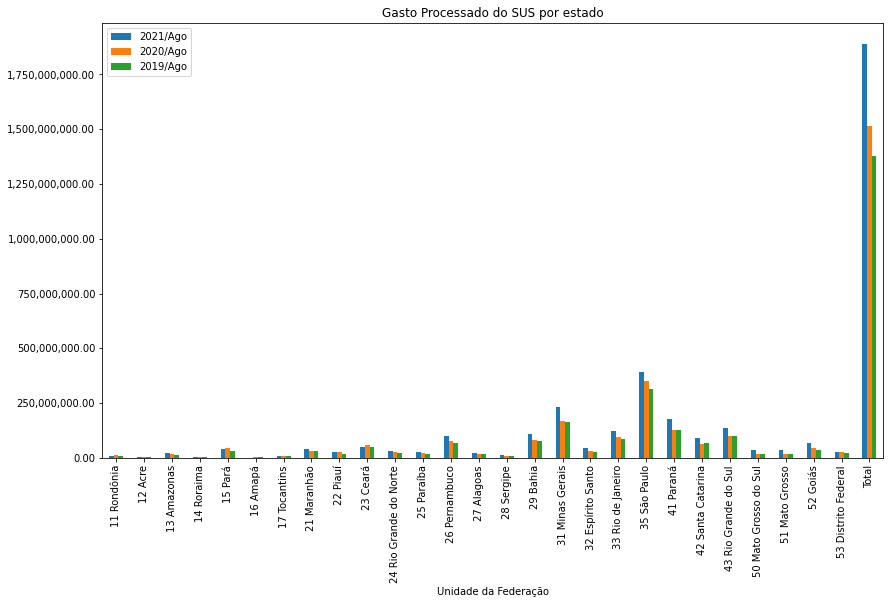

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

#plotando o gráfico de gasto por estado 
ax = dados.plot(x="Unidade da Federação", y=["2021/Ago", "2020/Ago", "2019/Ago"], kind="bar", figsize=(14,8))
plt.title("Gasto Processado do SUS por estado")
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
plt.show()
plt.style.use('ggplot')

In [ ]:
 #importando o banco de dados de qndo foi feito o procedimento
URL = 'https://raw.githubusercontent.com/arturcgs/BootcampDataScienceAplicada3/main/Bancos_de_Dados/Prod_Hosp_SUS%20-%20Atendimento.csv'
dados2 = pd.read_csv(URL, encoding="utf-8", 
                    skiprows = 3, sep=";", skipfooter=11, 
                    thousands=".", decimal=",")
dados2.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  """


,Unidade da Federação,1992/Mar,1992/Abr,1993/Mai,1993/Dez,1994/Jan,1994/Fev,1994/Mai,1994/Ago,1994/Nov,1995/Jan,1995/Mar,1995/Jun,1995/Ago,1995/Dez,1996/Fev,1996/Mar,1996/Ago,1996/Dez,1997/Fev,1997/Nov,1998/Fev,1998/Mar,1998/Jul,1998/Ago,1998/Set,1998/Out,1998/Dez,1999/Fev,1999/Mar,1999/Mai,1999/Jul,1999/Ago,1999/Set,1999/Out,1999/Nov,1999/Dez,2000/Jan,2000/Fev,2000/Mar,...,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,2021/Abr,2021/Mai,2021/Jun,2021/Jul,2021/Ago,2021/Set,Total
0,11 Rondônia,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,10068,10339,9821,10357,10086,9561,9448,9580,10572,10785,11290,9995,9940,9942,10147,10367,10365,9861,9838,9506,8710,7159,7443,7797,8560,9073,8596,9004,9139,8801,8932,8676,10153,10051,10243,9220,8130,6192,1826,1448181
1,12 Acre,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,3980,4066,3793,3961,3120,3024,3511,3162,3259,3589,4065,3987,4032,3872,3989,4114,3654,3622,3861,3799,3668,2840,2818,3073,3571,3574,3726,3985,3859,3901,4061,3846,4030,3930,4161,3853,3391,2097,-,659770
2,13 Amazonas,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,16276,16129,15388,16098,15183,14726,16056,14900,16965,16363,16663,16043,16828,17190,16336,16995,16072,15462,16599,15464,15347,12297,13284,13955,15422,15734,15750,15819,15499,16391,17966,15758,17649,16847,17922,17552,17543,14105,7167,2361068
3,14 Roraima,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,3939,4048,3814,3779,3258,3286,3516,3329,3463,3636,3632,3507,3922,4084,3956,4199,3925,3551,3731,3593,3452,2584,2884,2974,3080,3332,3302,3404,3250,3371,3541,3415,3612,3407,3616,3576,3580,3239,2072,487698
4,15 Pará,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,40483,42650,41033,43606,39448,38237,41265,38062,41238,40082,40816,36955,40696,40637,41054,42402,40457,39009,41444,38620,37848,29001,31530,32415,36057,37171,36745,38545,37309,36327,37233,35158,41779,38160,39967,38167,33257,23036,5782,6703021


In [ ]:
# pegando somente as colunas que tem tds os campos preenchidos
colunas_usaveis = dados.mean().index.tolist()
colunas_usaveis.insert(0, "Unidade da Federação")

dados2_corrigido = dados2[colunas_usaveis]
dados2_corrigido = dados2_corrigido.set_index("Unidade da Federação") #adicionando o índice
dados2_corrigido.head()

,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,2011/Abr,2011/Mai,...,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,2021/Abr,2021/Mai,2021/Jun,2021/Jul,2021/Ago,Total
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,5242,5562,5105,5175,5148,6099,7080,7332,6875,6907,6699,5864,7062,6923,9130,8415,8403,7383,7884,8161,8521,8352,8359,8670,7945,9036,8551,8622,7861,8332,8618,8403,8182,8293,7930,7821,7785,8691,8836,8274,...,10051,10068,10339,9821,10357,10086,9561,9448,9580,10572,10785,11290,9995,9940,9942,10147,10367,10365,9861,9838,9506,8710,7159,7443,7797,8560,9073,8596,9004,9139,8801,8932,8676,10153,10051,10243,9220,8130,6192,1448181
12 Acre,3735,3723,4163,4223,4471,4478,4083,3823,4182,4141,3928,4060,4056,3782,4519,4274,4597,3933,3787,3027,4232,4158,4026,4034,3624,4556,4508,4293,3963,3958,4102,4156,4406,4124,4054,4621,4129,4573,4351,4863,...,3854,3980,4066,3793,3961,3120,3024,3511,3162,3259,3589,4065,3987,4032,3872,3989,4114,3654,3622,3861,3799,3668,2840,2818,3073,3571,3574,3726,3985,3859,3901,4061,3846,4030,3930,4161,3853,3391,2097,659770
13 Amazonas,16105,13830,14870,14323,14914,14578,14938,14419,13349,12607,12137,12054,12594,12171,13892,12228,12530,13410,13493,13746,12616,12711,12554,13547,12403,14619,13676,13545,13197,13188,13595,13492,14069,13214,13308,13981,13492,15193,14388,13666,...,15376,16276,16129,15388,16098,15183,14726,16056,14900,16965,16363,16663,16043,16828,17190,16336,16995,16072,15462,16599,15464,15347,12297,13284,13955,15422,15734,15750,15819,15499,16391,17966,15758,17649,16847,17922,17552,17543,14105,2361068
14 Roraima,1898,1739,2047,2211,2415,2295,2228,2298,2116,2205,2122,1986,2224,2142,2525,2256,2372,2371,2646,2610,2473,2447,2236,2568,2277,2828,2590,2984,3028,3085,3099,2800,2658,2528,2382,2541,1984,2077,2185,2620,...,3813,3939,4048,3814,3779,3258,3286,3516,3329,3463,3636,3632,3507,3922,4084,3956,4199,3925,3551,3731,3593,3452,2584,2884,2974,3080,3332,3302,3404,3250,3371,3541,3415,3612,3407,3616,3576,3580,3239,487698
15 Pará,43852,40231,43323,44804,44901,43422,42168,42630,43168,41580,39506,38092,42672,39248,46803,45701,44886,43625,44195,46068,44502,44227,41354,43788,42352,48042,44279,46368,43794,41939,45707,44420,42919,43122,42314,44277,42080,46632,42499,43524,...,41049,40483,42650,41033,43606,39448,38237,41265,38062,41238,40082,40816,36955,40696,40637,41054,42402,40457,39009,41444,38620,37848,29001,31530,32415,36057,37171,36745,38545,37309,36327,37233,35158,41779,38160,39967,38167,33257,23036,6703021


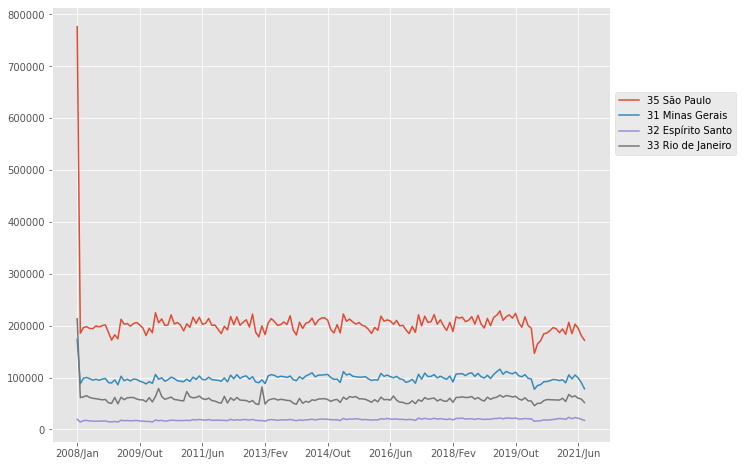

In [ ]:
#tirando a coluna e linha total
dados2_plot = dados2_corrigido.drop("Total", axis=1)
dados2_plot = dados2_plot.drop("Total", axis=0)

#selecionando estados desejados
estados_desejados = ["35 São Paulo", "31 Minas Gerais", "32 Espírito Santo", "33 Rio de Janeiro"]

#plotando o gráfico
dados2_plot.loc[estados_desejados].T.plot(figsize=(10,8))
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.732))


In [ ]:
#Adicionando uma coluna com a região de cada estado

regioes = ["Norte", "Norte", "Norte", "Norte", "Norte", "Norte", "Norte", "Nordeste", "Nordeste", 
           "Nordeste", "Nordeste", "Nordeste", "Nordeste", "Nordeste", "Nordeste", "Nordeste", "Sudeste", "Sudeste", 
           "Sudeste", "Sudeste", "Sul", "Sul", "Sul", "Centro-Oeste", "Centro-Oeste", "Centro-Oeste", "Centro-Oeste"]

dados2_plot["Região"] = regioes

In [ ]:
#ordenando pelo total
dados2_ordenado_por_total = dados2_corrigido.sort_values("Total", ascending=False)

#tirando a linha e coluna total
dados2_ordenado_por_total = dados2_ordenado_por_total.drop("Total", axis=1)
dados2_ordenado_por_total = dados2_ordenado_por_total.drop("Total", axis=0)

#tirando 2008/Jan pq o dado ta estranho
dados2_ordenado_por_total = dados2_ordenado_por_total.drop("2008/Jan", axis=1)

dados2_ordenado_por_total.head()

,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,2011/Abr,2011/Mai,2011/Jun,...,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,2021/Abr,2021/Mai,2021/Jun,2021/Jul,2021/Ago
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
35 São Paulo,185424,196292,197998,194572,194274,199476,197696,200207,201527,186728,172055,182396,174641,212291,202948,204082,198990,204255,206033,201291,195321,180902,195241,186313,225150,205586,213090,200474,201506,220904,203220,206015,201149,189971,203610,196758,216346,204467,216153,202668,...,216358,207759,210411,217371,203309,219959,203096,195481,214024,200078,215743,220231,228400,210317,217353,220742,214419,223763,205978,196946,217091,200082,195266,146523,164615,171032,184096,185925,190535,196360,193982,186506,193733,183358,206522,184645,203011,194824,180948,171739
31 Minas Gerais,87923,98695,100205,97799,94915,96763,94759,96915,98250,90231,89594,95594,86029,102545,93834,96798,93338,97197,96338,92828,90975,87738,91998,88850,105939,96786,99391,92855,95841,100743,98170,93831,92741,92018,96859,92380,100749,96376,103022,96284,...,107467,103629,107773,109056,102226,108087,101595,99063,104374,98222,105854,111283,116131,106341,111848,108878,107201,110318,103499,101561,105666,98555,97102,77315,84585,86325,91884,92286,93865,96340,95670,94152,95672,89876,105316,97491,104932,99250,90283,78257
29 Bahia,60993,75006,80573,75881,69198,91182,75848,75074,71669,64643,61896,67990,64126,81365,76295,76771,71157,75225,76577,74433,74011,69139,71937,67226,82803,77954,82216,69310,73221,78157,74639,74344,73436,69611,75173,70505,78737,75869,77325,71443,...,73330,67352,72229,72712,69424,72600,67485,65372,68290,65385,69435,73113,78370,69170,75377,73568,71377,74515,68337,63430,67886,64783,63984,48184,49724,51266,55718,57083,59909,64245,61063,57027,58032,56828,63277,62127,68430,62228,57968,47609
41 Paraná,57836,64918,65000,65191,64095,67194,62628,64621,65187,59416,57034,59901,58283,70984,64644,67658,65752,69770,68570,66679,65124,61475,63445,62182,75306,67295,69203,66806,68118,69884,68508,66338,66841,63485,65811,63008,68519,63424,68299,62638,...,76675,74811,77485,77894,72632,77616,73922,67978,73970,71266,75898,78323,81018,74036,79212,75807,74963,77495,72990,68866,73521,71567,68657,54030,56963,56607,57605,58197,61779,65615,65777,59700,62234,62025,64971,63520,68096,58837,52557,44508
43 Rio Grande do Sul,55069,61981,60256,59481,61247,64957,61716,62381,62771,58966,55916,59546,52516,63938,59968,62237,61688,67181,62868,63420,61235,58719,60162,54508,65389,60789,62943,61134,63502,64580,60160,60655,58433,55424,59924,54461,61917,58548,62816,61581,...,63871,63258,67440,66977,60077,65406,60409,56459,62841,56740,62051,64800,68693,66257,69638,68249,64638,66959,62077,59879,65292,58402,57158,44976,50748,52744,53325,53980,55703,59065,59520,56505,58901,55060,60256,56110,61486,59053,55995,47560


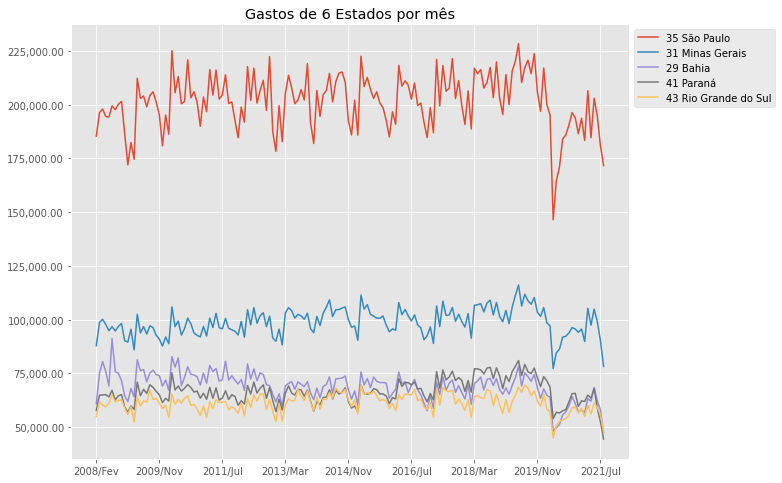

In [ ]:
#plotando o gráfico de linha pros 5 estados com maior gasto

ax = dados2_ordenado_por_total.head().T.plot(figsize=(10,8))
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.title("Gastos de 6 Estados por mês")
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
plt.show()

In [ ]:
#separar o 5 estados com maior gasto e o Acre
cinco_maior_Ac = dados2_ordenado_por_total.head()
cinco_maior_Ac = cinco_maior_Ac.append(dados2_ordenado_por_total.loc["12 Acre"])
cinco_maior_Ac

,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,2011/Abr,2011/Mai,2011/Jun,...,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,2021/Abr,2021/Mai,2021/Jun,2021/Jul,2021/Ago
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
35 São Paulo,185424,196292,197998,194572,194274,199476,197696,200207,201527,186728,172055,182396,174641,212291,202948,204082,198990,204255,206033,201291,195321,180902,195241,186313,225150,205586,213090,200474,201506,220904,203220,206015,201149,189971,203610,196758,216346,204467,216153,202668,...,216358,207759,210411,217371,203309,219959,203096,195481,214024,200078,215743,220231,228400,210317,217353,220742,214419,223763,205978,196946,217091,200082,195266,146523,164615,171032,184096,185925,190535,196360,193982,186506,193733,183358,206522,184645,203011,194824,180948,171739
31 Minas Gerais,87923,98695,100205,97799,94915,96763,94759,96915,98250,90231,89594,95594,86029,102545,93834,96798,93338,97197,96338,92828,90975,87738,91998,88850,105939,96786,99391,92855,95841,100743,98170,93831,92741,92018,96859,92380,100749,96376,103022,96284,...,107467,103629,107773,109056,102226,108087,101595,99063,104374,98222,105854,111283,116131,106341,111848,108878,107201,110318,103499,101561,105666,98555,97102,77315,84585,86325,91884,92286,93865,96340,95670,94152,95672,89876,105316,97491,104932,99250,90283,78257
29 Bahia,60993,75006,80573,75881,69198,91182,75848,75074,71669,64643,61896,67990,64126,81365,76295,76771,71157,75225,76577,74433,74011,69139,71937,67226,82803,77954,82216,69310,73221,78157,74639,74344,73436,69611,75173,70505,78737,75869,77325,71443,...,73330,67352,72229,72712,69424,72600,67485,65372,68290,65385,69435,73113,78370,69170,75377,73568,71377,74515,68337,63430,67886,64783,63984,48184,49724,51266,55718,57083,59909,64245,61063,57027,58032,56828,63277,62127,68430,62228,57968,47609
41 Paraná,57836,64918,65000,65191,64095,67194,62628,64621,65187,59416,57034,59901,58283,70984,64644,67658,65752,69770,68570,66679,65124,61475,63445,62182,75306,67295,69203,66806,68118,69884,68508,66338,66841,63485,65811,63008,68519,63424,68299,62638,...,76675,74811,77485,77894,72632,77616,73922,67978,73970,71266,75898,78323,81018,74036,79212,75807,74963,77495,72990,68866,73521,71567,68657,54030,56963,56607,57605,58197,61779,65615,65777,59700,62234,62025,64971,63520,68096,58837,52557,44508
43 Rio Grande do Sul,55069,61981,60256,59481,61247,64957,61716,62381,62771,58966,55916,59546,52516,63938,59968,62237,61688,67181,62868,63420,61235,58719,60162,54508,65389,60789,62943,61134,63502,64580,60160,60655,58433,55424,59924,54461,61917,58548,62816,61581,...,63871,63258,67440,66977,60077,65406,60409,56459,62841,56740,62051,64800,68693,66257,69638,68249,64638,66959,62077,59879,65292,58402,57158,44976,50748,52744,53325,53980,55703,59065,59520,56505,58901,55060,60256,56110,61486,59053,55995,47560
12 Acre,3723,4163,4223,4471,4478,4083,3823,4182,4141,3928,4060,4056,3782,4519,4274,4597,3933,3787,3027,4232,4158,4026,4034,3624,4556,4508,4293,3963,3958,4102,4156,4406,4124,4054,4621,4129,4573,4351,4863,4364,...,3970,3854,3980,4066,3793,3961,3120,3024,3511,3162,3259,3589,4065,3987,4032,3872,3989,4114,3654,3622,3861,3799,3668,2840,2818,3073,3571,3574,3726,3985,3859,3901,4061,3846,4030,3930,4161,3853,3391,2097


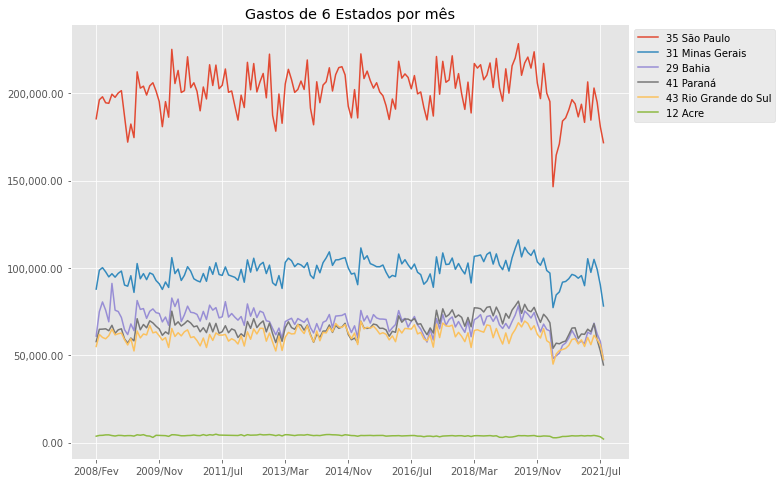

In [ ]:
#plotando o gráfico de linha pros 5 estados com maior gasto mais o Acre

ax = cinco_maior_Ac.T.plot(figsize=(10,8))
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.title("Gastos de 6 Estados por mês")
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
plt.show()

In [43]:
#pegando o mês mais recente
mes_mais_recente = dados2_ordenado_por_total.columns[-1]
mes_mais_recente

#comparando tds os estados com sp
dados2_comparando_sp = dados2_ordenado_por_total[mes_mais_recente] / dados2_ordenado_por_total[mes_mais_recente].loc["35 São Paulo"]
dados2_comparando_sp.head()

#ordenando do maior pro menor
dados2_comparando_sp = dados2_comparando_sp.sort_values(ascending=False)

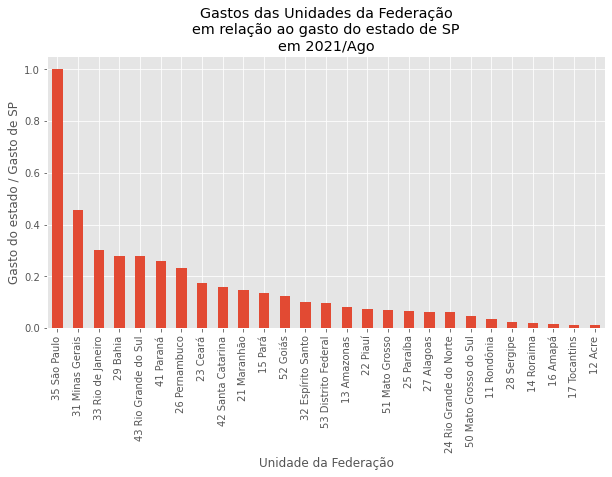

In [58]:
#plotando o gráfico de comparação entre os estados e SP
dados2_comparando_sp.plot(kind = 'bar', figsize = (10,5), 
                          ylabel = 'Gasto do estado / Gasto de SP')
plt.title("Gastos das Unidades da Federação\nem relação ao gasto do estado de SP\nem %s" %(mes_mais_recente))
plt.show()

In [57]:
#tabela comparativa dos gastos dos estados com SP

dados2_comparando_sp

Unidade da Federação
35 São Paulo             1.00
31 Minas Gerais          0.46
33 Rio de Janeiro        0.30
29 Bahia                 0.28
43 Rio Grande do Sul     0.28
41 Paraná                0.26
26 Pernambuco            0.23
23 Ceará                 0.17
42 Santa Catarina        0.16
21 Maranhão              0.15
15 Pará                  0.13
52 Goiás                 0.12
32 Espírito Santo        0.10
53 Distrito Federal      0.10
13 Amazonas              0.08
22 Piauí                 0.07
51 Mato Grosso           0.07
25 Paraíba               0.07
27 Alagoas               0.06
24 Rio Grande do Norte   0.06
50 Mato Grosso do Sul    0.05
11 Rondônia              0.04
28 Sergipe               0.02
14 Roraima               0.02
16 Amapá                 0.02
17 Tocantins             0.01
12 Acre                  0.01
Name: 2021/Ago, dtype: float64

In [123]:
#Puxando a DataBase de População em 2021
URL = 'https://raw.githubusercontent.com/arturcgs/BootcampDataScienceAplicada3/main/Bancos_de_Dados/Populacao_2021.csv'
populacao_2021 = pd.read_csv(URL, encoding="utf-8", 
                    sep=";;", thousands=".", decimal=",", engine='python')
populacao_2021

,População
Rondônia,1815278
Acre,906876
Amazonas,4269995
Roraima,652713
Pará,8777124
Amapá,877613
Tocantins,1607363
Maranhão,7153262
Piauí,3289290
Ceará,9240580


In [128]:
#Pegando a soma de tds os gastos de 2021, por estado e organizando em ordem decrescente
dados2_2021 = dados2_ordenado_por_total[["2021/Jan", "2021/Fev", "2021/Mar", "2021/Abr", "2021/Mai", "2021/Jun", "2021/Jul", "2021/Ago"]]
dados2_2021 = dados2_2021.sum(axis=1).sort_values(ascending=False)

#separando o sudeste
dados2_2021_sudeste = dados2_2021.loc[["35 São Paulo", "31 Minas Gerais", "33 Rio de Janeiro", "32 Espírito Santo"]]
dados2_2021_sudeste

#dividindo cada estado por sua população
dados2_2021_por_populacao_sudeste = dados2_2021_sudeste.copy()
dados2_2021_por_populacao_sudeste["35 São Paulo"] = dados2_2021_por_populacao_sudeste["35 São Paulo"] / populacao_2021.loc["São Paulo"]
dados2_2021_por_populacao_sudeste

Unidade da Federação
35 São Paulo              0
31 Minas Gerais      761077
33 Rio de Janeiro    478757
32 Espírito Santo    165331
dtype: int64

In [126]:
populacao_2021.loc["São Paulo"]

População    46649132
Name: São Paulo, dtype: int64

In [127]:
dados2_2021

Unidade da Federação
35 São Paulo              1518780
31 Minas Gerais            761077
33 Rio de Janeiro          478757
41 Paraná                  476748
29 Bahia                   476499
43 Rio Grande do Sul       454421
26 Pernambuco              357532
23 Ceará                   320436
15 Pará                    286757
42 Santa Catarina          281758
21 Maranhão                273383
52 Goiás                   218038
32 Espírito Santo          165331
53 Distrito Federal        151371
13 Amazonas                135342
22 Piauí                   129868
51 Mato Grosso             120574
25 Paraíba                 116753
24 Rio Grande do Norte     114050
27 Alagoas                 105658
50 Mato Grosso do Sul      102474
11 Rondônia                 71597
28 Sergipe                  57859
17 Tocantins                45039
12 Acre                     29369
14 Roraima                  27986
16 Amapá                    25358
dtype: int64